## this page's issues/to-dos: 
2. averaging dists for each sex 
3. come up with nice way to plot
4. statistical tests between them

#### import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import locomotion_functions as lf
from pathlib import Path
import pickle
import pandas as pd

#### directory setup (works)

In [2]:
dlc_dir = Path.cwd().parent
scripts_dir = dlc_dir.joinpath("Scripts")
results_dir = dlc_dir.joinpath("Results", "p14_oxtrko")
pose_dir = results_dir.joinpath("pose_estimation")
video_dir = dlc_dir.joinpath("Videos", "p14_isolation_cropped")
locomotion_dir = results_dir.joinpath("locomotion")
print(dlc_dir)
print(scripts_dir) 
print(pose_dir)
print(video_dir)

/Users/gracehickey/Documents/Research/Hammock/HTM/DLC
/Users/gracehickey/Documents/Research/Hammock/HTM/DLC/Scripts
/Users/gracehickey/Documents/Research/Hammock/HTM/DLC/Results/p14_oxtrko/pose_estimation
/Users/gracehickey/Documents/Research/Hammock/HTM/DLC/Videos/p14_isolation_cropped


#### file, name, video lists (works)

In [26]:
# Create a list of csv files in the pose estimation directory, the names of those subjects, and their videos
subject_list_path = results_dir.joinpath("subject_list.csv")

# p14 oxtrkos: col 0 = id, 1 = genotype, 2 = sex
subj_df = pd.read_csv(subject_list_path)    # import subject list dataframe
subjects = subj_df["subject"].values.tolist()
sexes = subj_df["sex"].values.tolist()

subjects.remove("20231222_6") # removed because pose estimation file is weirdly short (only 60k frames)

# sort by sex 
M_subj = subj_df.loc[subj_df["sex"] == "M", "subject"].tolist() # make male list 
F_subj = subj_df.loc[subj_df["sex"] == "F", "subject"].tolist() # make WT list
F_subj.remove("20231222_6")

# sort by genotype 
WT_subj = subj_df.loc[subj_df["genotype"] == "WT", "subject"].tolist() # make wildtype list
het_subj = subj_df.loc[subj_df["genotype"] == "Het", "subject"].tolist() # make het list
het_subj.remove("20231222_6")
KO_subj = subj_df.loc[subj_df["genotype"] == "KO", "subject"].tolist() # make KO list

## testing: only use first experimental date
# subjects = subjects[0:9]
# sexes = sexes[0:9]

csvs = [locomotion_dir.joinpath("second_movement", f"{name}_sec_dists.csv") for name in subjects]
# print(csvs)

videos = [video_dir.joinpath(f"p14_isolation_{name}.mp4") for name in subjects]
# print(videos)

bodyparts = ["nose", "head_midpoint", "mouse_center", "tail_base", "tail3", "tail_end", "left_shoulder", "right_shoulder", "left_midside", "right_midside", "left_hip", "right_hip"]

In [ ]:
# inds to remove


#### five minute binning (works)

In [4]:
# read in the multi-indexed csv 

# read in the distance array and tell it index columns are 0, 1, 2 (name, bodypart, minute/second)
# subjects = [""]

for i, ind in enumerate(subjects):
    sec_dist_path = locomotion_dir.joinpath("second_movement", f"{ind}_sec_dists.csv")
    df = pd.read_csv(sec_dist_path, index_col=[0, 1, 2])
    dfs = []

    export_path = Path(f"{locomotion_dir}/five_minute_movement/{ind}_fivemins.csv")
    if export_path.is_file():
        print(f"{ind}'s five minute spreadsheet has already been created.")
        continue
    
    for part in bodyparts:
        # read in sec_dists from csv for each bodypart
        sec_dists = df.xs(
            (ind, part),
            level=("name", "bodypart")
        )["distance"].to_numpy()

        # use binned_dist function to bin data in 5 minute chunks
        fivemin_dists = lf.binned_dist(sec_dists, 5, 'm')
        m = len(fivemin_dists)
        df_loop = pd.DataFrame(
            {"distance": fivemin_dists},
            index=pd.MultiIndex.from_arrays(
                [
                    np.repeat(ind, m),
                    np.repeat(part, m),
                    np.arange(start=5, stop=(m+1)*5, step=5)
                ],
                names=["name", "bodypart", "minute"]
            )
        )
        dfs.append(df_loop)
    
    del df

    dfs_min = pd.concat(dfs)
    dfs_min.to_csv(Path(f"{locomotion_dir}/five_minute_movement/{ind}_fivemins.csv"))

    del dfs

20231220_1's five minute spreadsheet has already been created.
20231220_2's five minute spreadsheet has already been created.
20231220_3's five minute spreadsheet has already been created.
20231220_4's five minute spreadsheet has already been created.
20231220_5's five minute spreadsheet has already been created.
20231220_6's five minute spreadsheet has already been created.
20231220_7's five minute spreadsheet has already been created.
20231220_8's five minute spreadsheet has already been created.
20231220_9's five minute spreadsheet has already been created.
20231222_1's five minute spreadsheet has already been created.
20231222_2's five minute spreadsheet has already been created.
20231222_3's five minute spreadsheet has already been created.
20231222_4's five minute spreadsheet has already been created.
20231222_5's five minute spreadsheet has already been created.
20231222_6's five minute spreadsheet has already been created.
20231222_7's five minute spreadsheet has already been c

### 20 minute binning

In [21]:
# read in the multi-indexed csv 

# read in the distance array and tell it index columns are 0, 1, 2 (name, bodypart, minute/second)
# subjects = [""]

for i, ind in enumerate(subjects):
    sec_dist_path = locomotion_dir.joinpath("second_movement", f"{ind}_sec_dists.csv")
    df = pd.read_csv(sec_dist_path, index_col=[0, 1, 2])
    dfs = []

    export_path = Path(f"{locomotion_dir}/twenty_minute_movement/{ind}_twentymins.csv")
    if export_path.is_file():
        print(f"{ind}'s twenty minute spreadsheet has already been created.")
        continue
    
    for part in bodyparts:
        # read in sec_dists from csv for each bodypart
        sec_dists = df.xs(
            (ind, part),
            level=("name", "bodypart")
        )["distance"].to_numpy()

        # use binned_dist function to bin data in 20 minute chunks
        fivemin_dists = lf.binned_dist(sec_dists, 20, 'm')
        m = len(fivemin_dists)
        df_loop = pd.DataFrame(
            {"distance": fivemin_dists},
            index=pd.MultiIndex.from_arrays(
                [
                    np.repeat(ind, m),
                    np.repeat(part, m),
                    np.arange(start=20, stop=(m+1)*20, step=20)
                ],
                names=["name", "bodypart", "minute"]
            )
        )
        dfs.append(df_loop)
    
    del df

    dfs_min = pd.concat(dfs)
    dfs_min.to_csv(export_path)

    del dfs

### sex differences

In [5]:
# averaging for each sex

# create df with all male and all female 5 min dists (i.e. each column is an individual; each row is a 5 minute interval. include all bodyparts)
loop_dfs = []
for i, ind in enumerate(M_subj):
    five_min_path = Path(f"{locomotion_dir}/five_minute_movement/{ind}_fivemins.csv")
    loop_df = pd.read_csv(five_min_path, usecols=["bodypart", "minute", "distance"], index_col=["bodypart", "minute"])
    
    loop_df.columns = [ind]
    loop_dfs.append(loop_df)

male_five_mins = pd.concat(loop_dfs, axis=1)
# filter to 85 minutes 
male_five_mins = male_five_mins.loc[
    male_five_mins.index.get_level_values('minute').isin([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
    ]


loop_dfs = []
for i, ind in enumerate(F_subj):
    five_min_path = Path(f"{locomotion_dir}/five_minute_movement/{ind}_fivemins.csv")
    loop_df = pd.read_csv(five_min_path, usecols=["bodypart", "minute", "distance"], index_col=["bodypart", "minute"])
    
    loop_df.columns = [ind]
    loop_dfs.append(loop_df)

female_five_mins = pd.concat(loop_dfs, axis=1)
# filter to 85 minutes 
female_five_mins = female_five_mins.loc[
    female_five_mins.index.get_level_values('minute').isin([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
    ]
female_five_mins["average"] = female_five_mins.mean(axis=1)



In [6]:
male_five_mins["average"] = male_five_mins.mean(axis=1)
male_five_mins["std"] = male_five_mins.std(axis=1)
female_five_mins["average"] = female_five_mins.mean(axis=1)
female_five_mins["std"] = female_five_mins.std(axis=1)


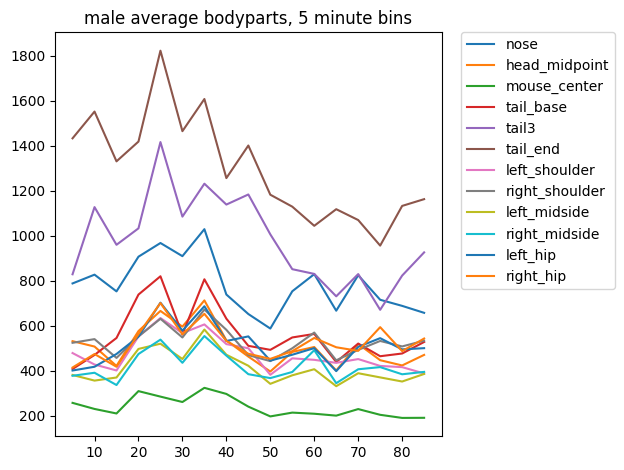

In [7]:
# plot for sexes (all bodyparts)
for part in bodyparts:
    male_avg = male_five_mins.xs(part, level="bodypart")["average"]
    plt.plot(male_avg, label=part)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("male average bodyparts, 5 minute bins")
plt.tight_layout()

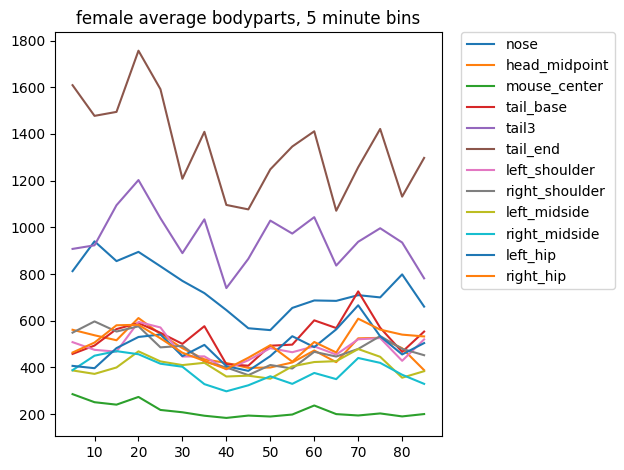

In [ ]:
# plot averages (all bodyparts)
for part in bodyparts:
    female_avg = female_five_mins.xs(part, level="bodypart")["average"]
    plt.plot(female_avg, label=part)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("female average bodyparts, 5 minute bins")
plt.tight_layout()

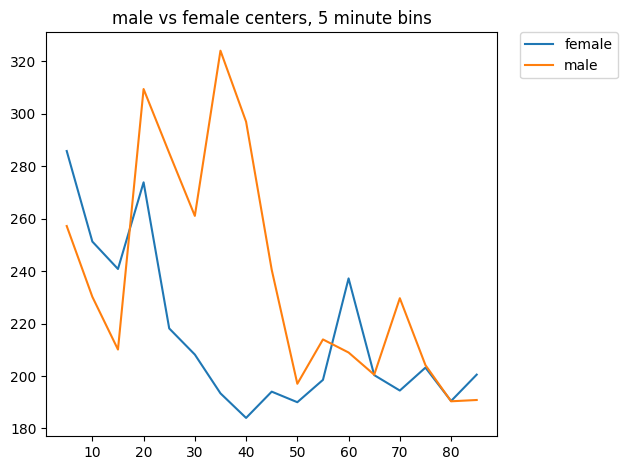

In [8]:
female_center_avg = female_five_mins.xs("mouse_center", level="bodypart")["average"]
male_center_avg = male_five_mins.xs("mouse_center", level="bodypart")["average"]
x_mins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
plt.plot(female_center_avg, label="female")
plt.plot(male_center_avg, label="male")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("male vs female centers, 5 minute bins")
plt.tight_layout()

### sex differences

In [ ]:
# averaging for each sex

# create df with all male and all female 5 min dists (i.e. each column is an individual; each row is a 5 minute interval. include all bodyparts)
loop_dfs = []
for i, ind in enumerate(M_subj):
    five_min_path = Path(f"{locomotion_dir}/five_minute_movement/{ind}_fivemins.csv")
    loop_df = pd.read_csv(five_min_path, usecols=["bodypart", "minute", "distance"], index_col=["bodypart", "minute"])
    
    loop_df.columns = [ind]
    loop_dfs.append(loop_df)

male_five_mins = pd.concat(loop_dfs, axis=1)
# filter to 85 minutes 
male_five_mins = male_five_mins.loc[
    male_five_mins.index.get_level_values('minute').isin([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
    ]


loop_dfs = []
for i, ind in enumerate(F_subj):
    five_min_path = Path(f"{locomotion_dir}/five_minute_movement/{ind}_fivemins.csv")
    loop_df = pd.read_csv(five_min_path, usecols=["bodypart", "minute", "distance"], index_col=["bodypart", "minute"])
    
    loop_df.columns = [ind]
    loop_dfs.append(loop_df)

female_five_mins = pd.concat(loop_dfs, axis=1)
# filter to 85 minutes 
female_five_mins = female_five_mins.loc[
    female_five_mins.index.get_level_values('minute').isin([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
    ]
female_five_mins["average"] = female_five_mins.mean(axis=1)



In [ ]:
male_five_mins["average"] = male_five_mins.mean(axis=1)
male_five_mins["std"] = male_five_mins.std(axis=1)
female_five_mins["average"] = female_five_mins.mean(axis=1)
female_five_mins["std"] = female_five_mins.std(axis=1)


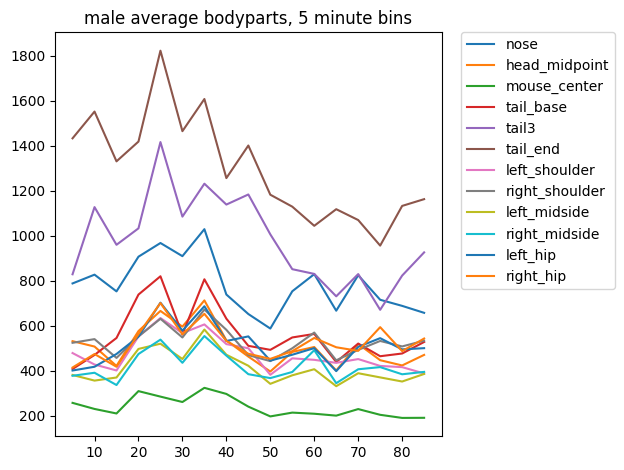

In [ ]:
# plot for sexes (all bodyparts)
for part in bodyparts:
    male_avg = male_five_mins.xs(part, level="bodypart")["average"]
    plt.plot(male_avg, label=part)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("male average bodyparts, 5 minute bins")
plt.tight_layout()

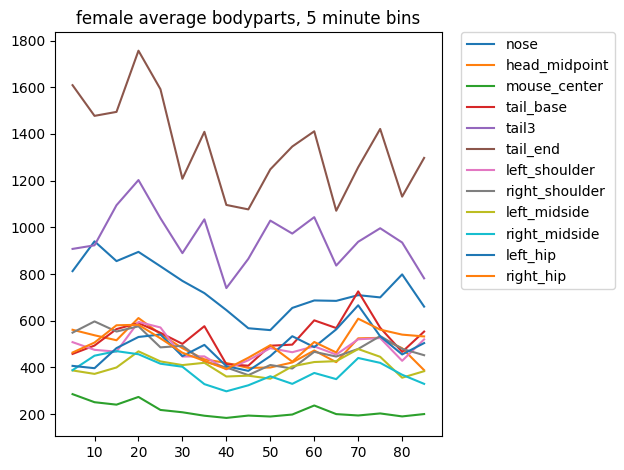

In [ ]:
# plot averages (all bodyparts)
for part in bodyparts:
    female_avg = female_five_mins.xs(part, level="bodypart")["average"]
    plt.plot(female_avg, label=part)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("female average bodyparts, 5 minute bins")
plt.tight_layout()

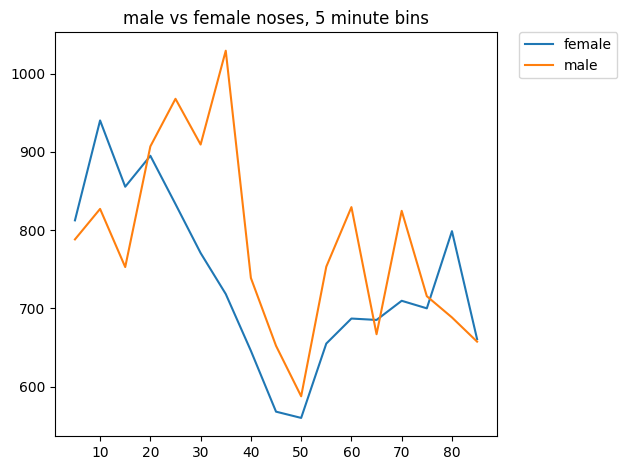

In [53]:
female_center_avg = female_five_mins.xs("nose", level="bodypart")["average"]
male_center_avg = male_five_mins.xs("nose", level="bodypart")["average"]
x_mins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
plt.plot(female_center_avg, label="female")
plt.plot(male_center_avg, label="male")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("male vs female noses, 5 minute bins")
plt.tight_layout()

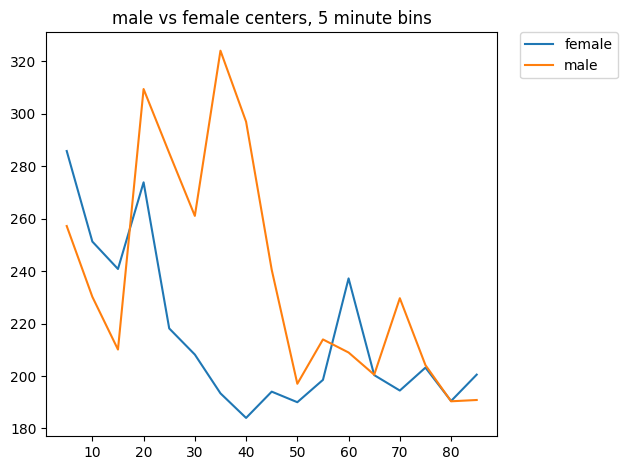

In [ ]:
female_center_avg = female_five_mins.xs("mouse_center", level="bodypart")["average"]
male_center_avg = male_five_mins.xs("mouse_center", level="bodypart")["average"]
x_mins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
plt.plot(female_center_avg, label="female")
plt.plot(male_center_avg, label="male")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("male vs female centers, 5 minute bins")
plt.tight_layout()

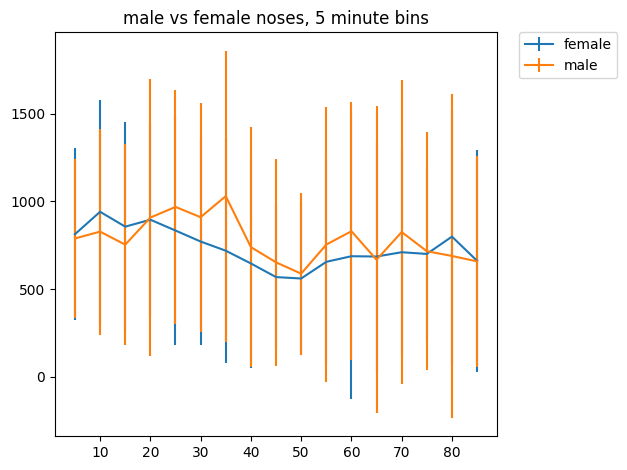

In [ ]:
# plot male vs female: using nose 
female_nose_avg = female_five_mins.xs("nose", level="bodypart")["average"]
female_nose_std = female_five_mins.xs("nose", level="bodypart")["std"]
male_nose_avg = male_five_mins.xs("nose", level="bodypart")["average"]
male_nose_std = male_five_mins.xs("nose", level="bodypart")["std"]

x_mins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

plt.errorbar(x_mins, female_nose_avg, yerr=female_nose_std, label="female")
plt.errorbar(x_mins, male_nose_avg, yerr=male_nose_std, label="male")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("male vs female noses, 5 minute bins")
plt.tight_layout()

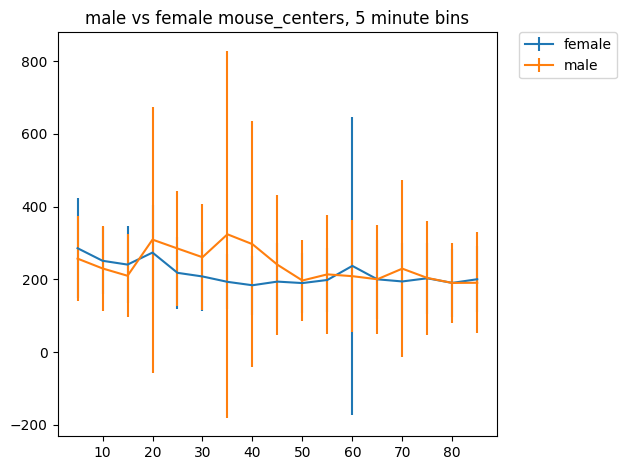

In [ ]:
# plot male vs female: using mouse_center 
female_mouse_center_avg = female_five_mins.xs("mouse_center", level="bodypart")["average"]
female_mouse_center_std = female_five_mins.xs("mouse_center", level="bodypart")["std"]
male_mouse_center_avg = male_five_mins.xs("mouse_center", level="bodypart")["average"]
male_mouse_center_std = male_five_mins.xs("mouse_center", level="bodypart")["std"]

x_mins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

plt.errorbar(x_mins, female_mouse_center_avg, yerr=female_mouse_center_std, label="female")
plt.errorbar(x_mins, male_mouse_center_avg, yerr=male_mouse_center_std, label="male")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("male vs female mouse_centers, 5 minute bins")
plt.tight_layout()

### genotype differences

In [63]:
# averaging for each genotype

# create df with all KO and all WT 5 min dists (i.e. each column is an individual; each row is a 5 minute interval. include all bodyparts)
loop_dfs = []
for i, ind in enumerate(KO_subj):
    five_min_path = Path(f"{locomotion_dir}/five_minute_movement/{ind}_fivemins.csv")
    loop_df = pd.read_csv(five_min_path, usecols=["bodypart", "minute", "distance"], index_col=["bodypart", "minute"])
    
    loop_df.columns = [ind]
    loop_dfs.append(loop_df)

KO_five_mins = pd.concat(loop_dfs, axis=1)
# filter to 85 minutes 
KO_five_mins = KO_five_mins.loc[
    KO_five_mins.index.get_level_values('minute').isin([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
    ]


loop_dfs = []
for i, ind in enumerate(WT_subj):
    five_min_path = Path(f"{locomotion_dir}/five_minute_movement/{ind}_fivemins.csv")
    loop_df = pd.read_csv(five_min_path, usecols=["bodypart", "minute", "distance"], index_col=["bodypart", "minute"])
    
    loop_df.columns = [ind]
    loop_dfs.append(loop_df)

WT_five_mins = pd.concat(loop_dfs, axis=1)
# filter to 85 minutes 
WT_five_mins = WT_five_mins.loc[
    WT_five_mins.index.get_level_values('minute').isin([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
    ]

loop_dfs = []
for i, ind in enumerate(het_subj):
    five_min_path = Path(f"{locomotion_dir}/five_minute_movement/{ind}_fivemins.csv")
    loop_df = pd.read_csv(five_min_path, usecols=["bodypart", "minute", "distance"], index_col=["bodypart", "minute"])
    
    loop_df.columns = [ind]
    loop_dfs.append(loop_df)

Het_five_mins = pd.concat(loop_dfs, axis=1)
# filter to 85 minutes 
Het_five_mins = Het_five_mins.loc[
    Het_five_mins.index.get_level_values('minute').isin([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
    ]


In [71]:
KO_five_mins["average"] = KO_five_mins.mean(axis=1)
KO_five_mins["std"] = KO_five_mins.std(axis=1)
WT_five_mins["average"] = WT_five_mins.mean(axis=1)
WT_five_mins["std"] = WT_five_mins.std(axis=1)

Het_five_mins["average"] = Het_five_mins.mean(axis=1)
Het_five_mins["std"] = Het_five_mins.std(axis=1)


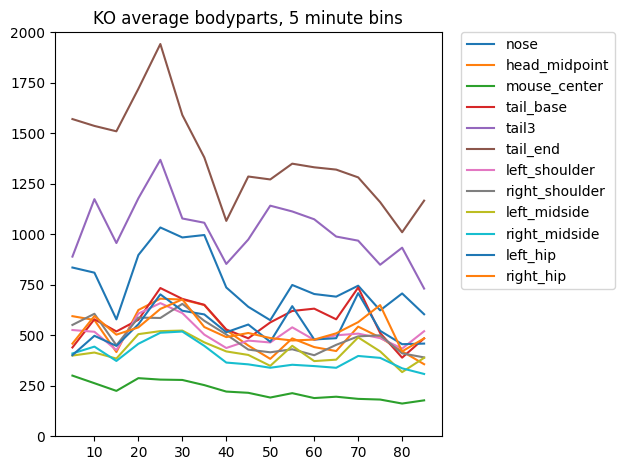

In [58]:
# plot for genotypes (all bodyparts) 
for part in bodyparts:
    KO_avg = KO_five_mins.xs(part, level="bodypart")["average"]
    plt.plot(KO_avg, label=part)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim(0,2000)
plt.title("KO average bodyparts, 5 minute bins")
plt.tight_layout()

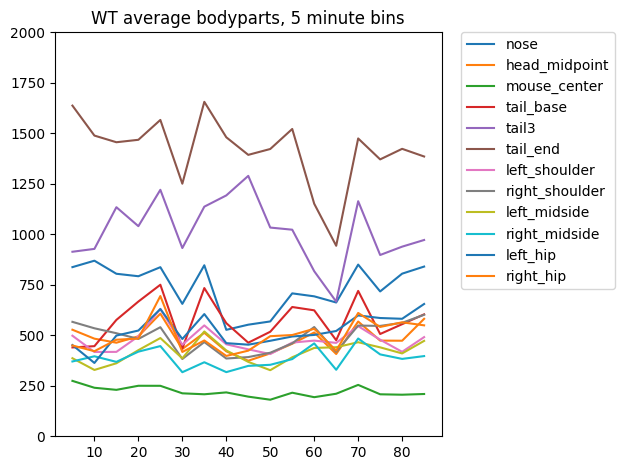

In [62]:
# plot for genotypes (all bodyparts)
for part in bodyparts:
    WT_avg = WT_five_mins.xs(part, level="bodypart")["average"]
    plt.plot(WT_avg, label=part)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim(0,2000)
plt.title("WT average bodyparts, 5 minute bins")
plt.tight_layout()

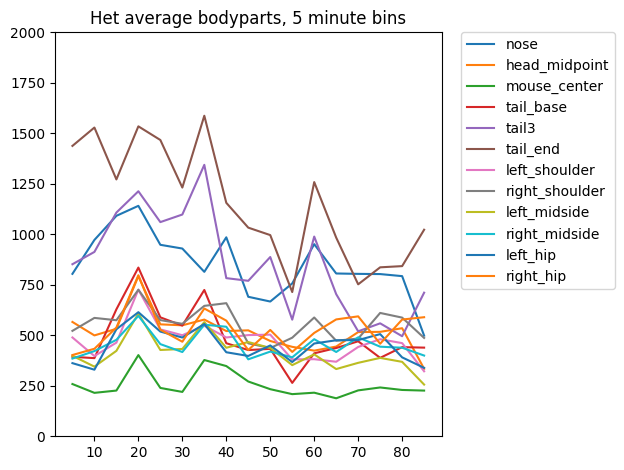

In [66]:
# plot for genotypes (all bodyparts)
for part in bodyparts:
    Het_avg = Het_five_mins.xs(part, level="bodypart")["average"]
    plt.plot(Het_avg, label=part)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim(0,2000)
plt.title("Het average bodyparts, 5 minute bins")
plt.tight_layout()

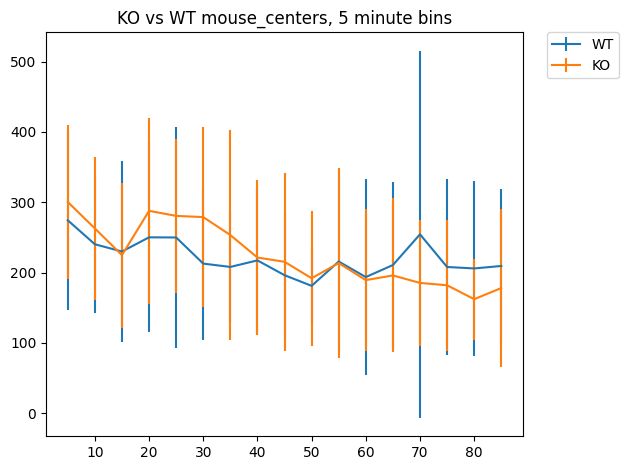

In [ ]:
# plot ko vs wt: using mouse_center 
WT_mouse_center_avg = WT_five_mins.xs("mouse_center", level="bodypart")["average"]
WT_mouse_center_std = WT_five_mins.xs("mouse_center", level="bodypart")["std"]
KO_mouse_center_avg = KO_five_mins.xs("mouse_center", level="bodypart")["average"]
KO_mouse_center_std = KO_five_mins.xs("mouse_center", level="bodypart")["std"]

x_mins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

plt.errorbar(x_mins, WT_mouse_center_avg, yerr=WT_mouse_center_std, label="WT")
plt.errorbar(x_mins, KO_mouse_center_avg, yerr=KO_mouse_center_std, label="KO")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("KO vs WT mouse_centers, 5 minute bins")
plt.tight_layout()

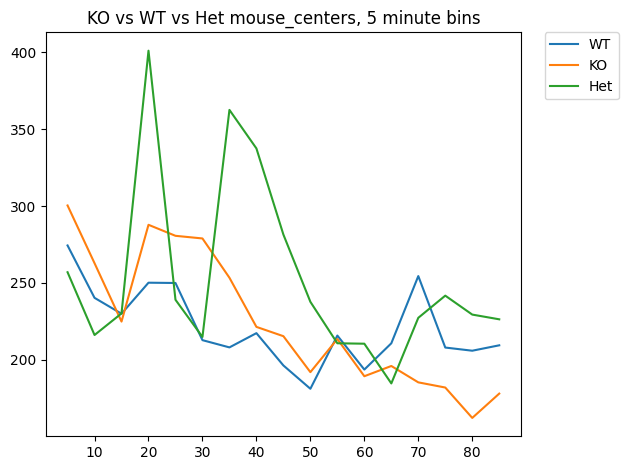

In [ ]:
# plot ko vs wt: using mouse_center 
WT_mouse_center_avg = WT_five_mins.xs("mouse_center", level="bodypart")["average"]
KO_mouse_center_avg = KO_five_mins.xs("mouse_center", level="bodypart")["average"]
Het_mouse_center_avg = Het_five_mins.xs("mouse_center", level="bodypart")["average"]


x_mins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

plt.plot(WT_mouse_center_avg, label="WT")
plt.plot(KO_mouse_center_avg, label="KO")
plt.plot(Het_mouse_center_avg, label="Het")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("KO vs WT vs Het mouse_centers, 5 minute bins")
plt.tight_layout()

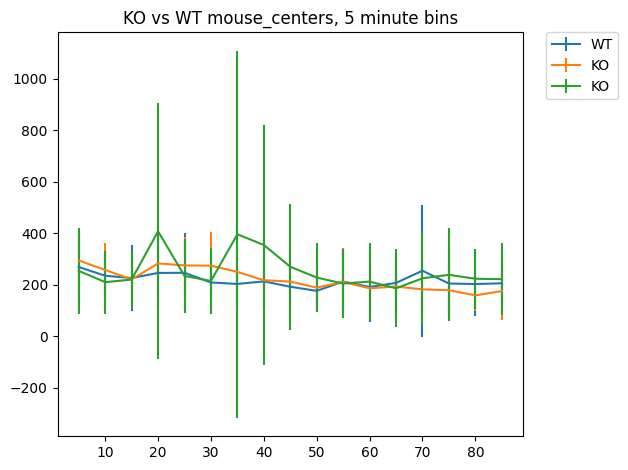

In [73]:
# plot ko vs wt: using mouse_center 
WT_mouse_center_avg = WT_five_mins.xs("mouse_center", level="bodypart")["average"]
WT_mouse_center_std = WT_five_mins.xs("mouse_center", level="bodypart")["std"]
KO_mouse_center_avg = KO_five_mins.xs("mouse_center", level="bodypart")["average"]
KO_mouse_center_std = KO_five_mins.xs("mouse_center", level="bodypart")["std"]
Het_mouse_center_avg = Het_five_mins.xs("mouse_center", level="bodypart")["average"]
Het_mouse_center_std = Het_five_mins.xs("mouse_center", level="bodypart")["std"]


x_mins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

plt.errorbar(x_mins, WT_mouse_center_avg, yerr=WT_mouse_center_std, label="WT")
plt.errorbar(x_mins, KO_mouse_center_avg, yerr=KO_mouse_center_std, label="KO")
plt.errorbar(x_mins, Het_mouse_center_avg, yerr=Het_mouse_center_std, label="KO")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("KO vs WT mouse_centers, 5 minute bins")
plt.tight_layout()

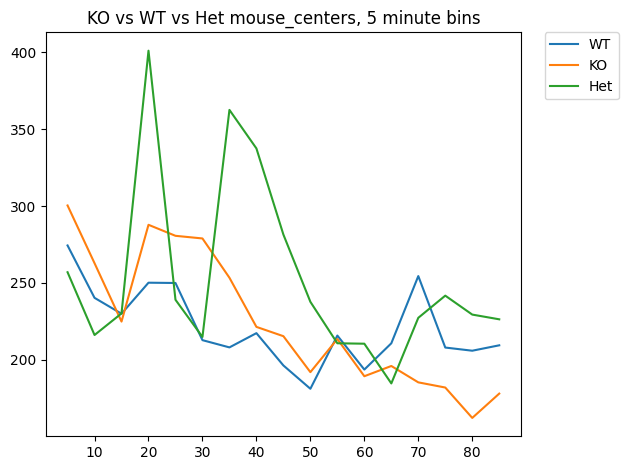

In [20]:
# plot ko vs wt: using mouse_center 
WT_mouse_center_avg = WT_five_mins.xs("mouse_center", level="bodypart")["average"]
KO_mouse_center_avg = KO_five_mins.xs("mouse_center", level="bodypart")["average"]
Het_mouse_center_avg = Het_five_mins.xs("mouse_center", level="bodypart")["average"]


x_mins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

plt.plot(WT_mouse_center_avg, label="WT")
plt.plot(KO_mouse_center_avg, label="KO")
plt.plot(Het_mouse_center_avg, label="Het")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("KO vs WT vs Het mouse_centers, 5 minute bins")
plt.tight_layout()

### sex differences: 20 minute bins

In [27]:
# averaging for each sex

# create df with all male and all female 5 min dists (i.e. each column is an individual; each row is a 5 minute interval. include all bodyparts)
loop_dfs = []
for i, ind in enumerate(M_subj):
    twenty_min_path = Path(f"{locomotion_dir}/twenty_minute_movement/{ind}_twentymins.csv")
    loop_df = pd.read_csv(twenty_min_path, usecols=["bodypart", "minute", "distance"], index_col=["bodypart", "minute"])
    
    loop_df.columns = [ind]
    loop_dfs.append(loop_df)

male_twenty_mins = pd.concat(loop_dfs, axis=1)
# filter to 85 minutes 
male_twenty_mins = male_twenty_mins.loc[
    male_twenty_mins.index.get_level_values('minute').isin([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
    ]


loop_dfs = []
for i, ind in enumerate(F_subj):
    twenty_min_path = Path(f"{locomotion_dir}/twenty_minute_movement/{ind}_twentymins.csv")
    loop_df = pd.read_csv(twenty_min_path, usecols=["bodypart", "minute", "distance"], index_col=["bodypart", "minute"])
    
    loop_df.columns = [ind]
    loop_dfs.append(loop_df)

female_twenty_mins = pd.concat(loop_dfs, axis=1)
# filter to 85 minutes 
female_twenty_mins = female_twenty_mins.loc[
    female_twenty_mins.index.get_level_values('minute').isin([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
    ]
female_twenty_mins["average"] = female_twenty_mins.mean(axis=1)



In [28]:
male_twenty_mins["average"] = male_twenty_mins.mean(axis=1)
male_twenty_mins["std"] = male_twenty_mins.std(axis=1)
female_twenty_mins["average"] = female_twenty_mins.mean(axis=1)
female_twenty_mins["std"] = female_twenty_mins.std(axis=1)


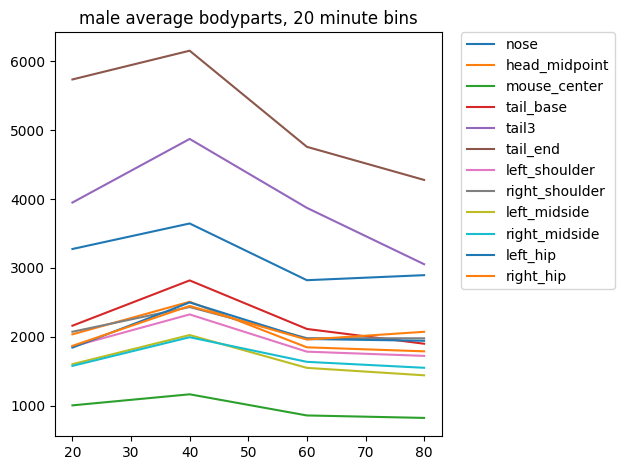

In [30]:
# plot for sexes (all bodyparts)
for part in bodyparts:
    male_avg = male_twenty_mins.xs(part, level="bodypart")["average"]
    plt.plot(male_avg, label=part)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("male average bodyparts, 20 minute bins")
plt.tight_layout()

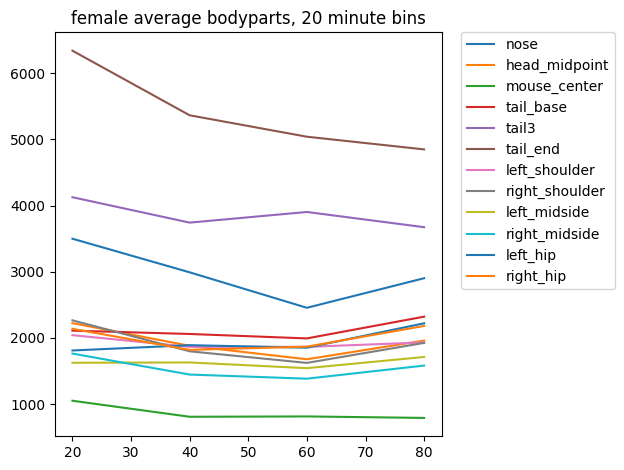

In [31]:
# plot averages (all bodyparts)
for part in bodyparts:
    female_avg = female_twenty_mins.xs(part, level="bodypart")["average"]
    plt.plot(female_avg, label=part)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("female average bodyparts, 20 minute bins")
plt.tight_layout()

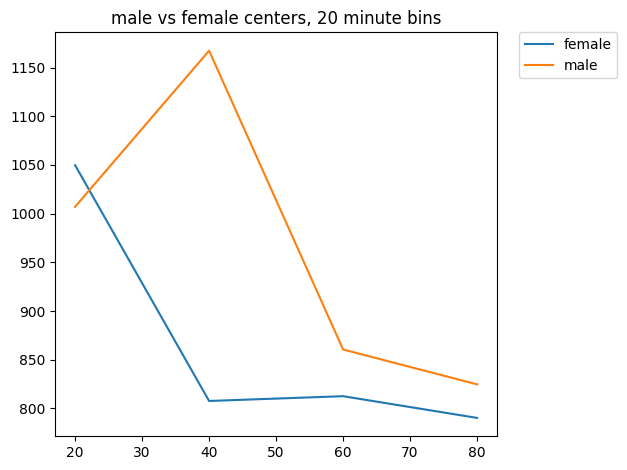

In [32]:
female_center_avg = female_twenty_mins.xs("mouse_center", level="bodypart")["average"]
male_center_avg = male_twenty_mins.xs("mouse_center", level="bodypart")["average"]
x_mins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
plt.plot(female_center_avg, label="female")
plt.plot(male_center_avg, label="male")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("male vs female centers, 20 minute bins")
plt.tight_layout()

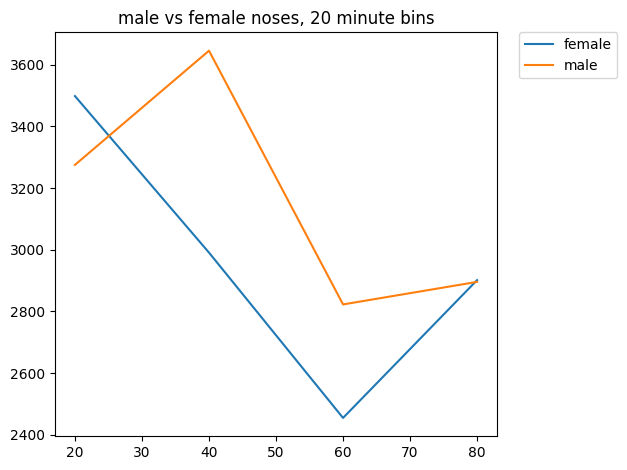

In [69]:
female_center_avg = female_twenty_mins.xs("nose", level="bodypart")["average"]
male_center_avg = male_twenty_mins.xs("nose", level="bodypart")["average"]
x_mins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
plt.plot(female_center_avg, label="female")
plt.plot(male_center_avg, label="male")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("male vs female noses, 20 minute bins")
plt.tight_layout()

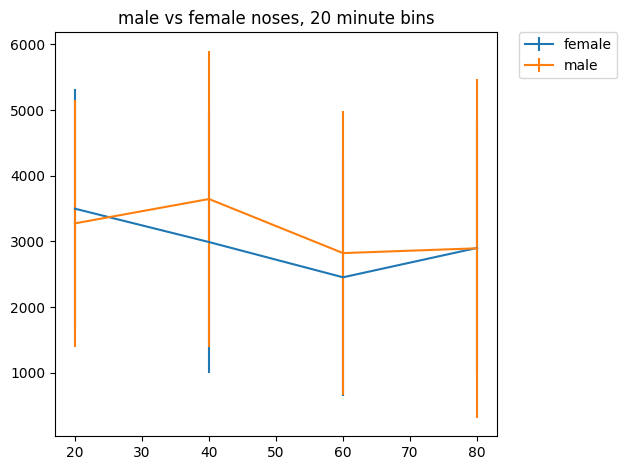

In [34]:
# plot male vs female: using nose 
female_nose_avg = female_twenty_mins.xs("nose", level="bodypart")["average"]
female_nose_std = female_twenty_mins.xs("nose", level="bodypart")["std"]
male_nose_avg = male_twenty_mins.xs("nose", level="bodypart")["average"]
male_nose_std = male_twenty_mins.xs("nose", level="bodypart")["std"]

x_mins = [20,40,60,80]

plt.errorbar(x_mins, female_nose_avg, yerr=female_nose_std, label="female")
plt.errorbar(x_mins, male_nose_avg, yerr=male_nose_std, label="male")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("male vs female noses, 20 minute bins")
plt.tight_layout()

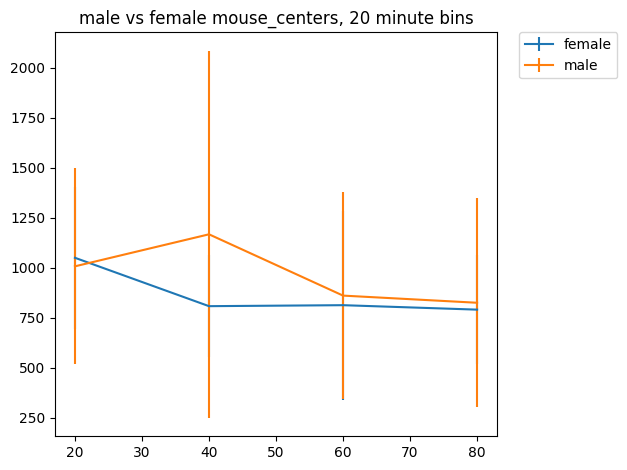

In [51]:
# plot male vs female: using mouse_center 
female_mouse_center_avg = female_twenty_mins.xs("mouse_center", level="bodypart")["average"]
female_mouse_center_std = female_twenty_mins.xs("mouse_center", level="bodypart")["std"]
male_mouse_center_avg = male_twenty_mins.xs("mouse_center", level="bodypart")["average"]
male_mouse_center_std = male_twenty_mins.xs("mouse_center", level="bodypart")["std"]

x_mins = [20,40,60,80]

plt.errorbar(x_mins, female_mouse_center_avg, yerr=female_mouse_center_std, label="female")
plt.errorbar(x_mins, male_mouse_center_avg, yerr=male_mouse_center_std, label="male")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("male vs female mouse_centers, 20 minute bins")
plt.tight_layout()

### genotype differences

In [37]:
# averaging for each genotype

# create df with all KO and all WT 5 min dists (i.e. each column is an individual; each row is a 5 minute interval. include all bodyparts)
loop_dfs = []
for i, ind in enumerate(KO_subj):
    twenty_min_path = Path(f"{locomotion_dir}/twenty_minute_movement/{ind}_twentymins.csv")
    loop_df = pd.read_csv(twenty_min_path, usecols=["bodypart", "minute", "distance"], index_col=["bodypart", "minute"])
    
    loop_df.columns = [ind]
    loop_dfs.append(loop_df)

KO_twenty_mins = pd.concat(loop_dfs, axis=1)
# filter to 85 minutes 
KO_twenty_mins = KO_twenty_mins.loc[
    KO_twenty_mins.index.get_level_values('minute').isin([20,40,60,80])
    ]


loop_dfs = []
for i, ind in enumerate(WT_subj):
    twenty_min_path = Path(f"{locomotion_dir}/twenty_minute_movement/{ind}_twentymins.csv")
    loop_df = pd.read_csv(twenty_min_path, usecols=["bodypart", "minute", "distance"], index_col=["bodypart", "minute"])
    
    loop_df.columns = [ind]
    loop_dfs.append(loop_df)

WT_twenty_mins = pd.concat(loop_dfs, axis=1)
# filter to 85 minutes 
WT_twenty_mins = WT_twenty_mins.loc[
    WT_twenty_mins.index.get_level_values('minute').isin([20,40,60,80])
    ]

loop_dfs = []
for i, ind in enumerate(het_subj):
    twenty_min_path = Path(f"{locomotion_dir}/twenty_minute_movement/{ind}_twentymins.csv")
    loop_df = pd.read_csv(twenty_min_path, usecols=["bodypart", "minute", "distance"], index_col=["bodypart", "minute"])
    
    loop_df.columns = [ind]
    loop_dfs.append(loop_df)

Het_twenty_mins = pd.concat(loop_dfs, axis=1)
# filter to 85 minutes 
Het_twenty_mins = Het_twenty_mins.loc[
    Het_twenty_mins.index.get_level_values('minute').isin([20,40,60,80])
    ]


In [38]:
KO_twenty_mins["average"] = KO_twenty_mins.mean(axis=1)
KO_twenty_mins["std"] = KO_twenty_mins.std(axis=1)
WT_twenty_mins["average"] = WT_twenty_mins.mean(axis=1)
WT_twenty_mins["std"] = WT_twenty_mins.std(axis=1)

Het_twenty_mins["average"] = Het_twenty_mins.mean(axis=1)
Het_twenty_mins["std"] = Het_twenty_mins.std(axis=1)


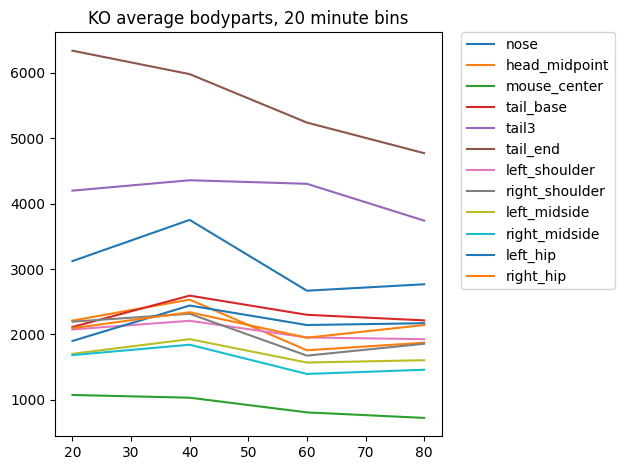

In [50]:
# plot for genotypes (all bodyparts) 
for part in bodyparts:
    KO_avg = KO_twenty_mins.xs(part, level="bodypart")["average"]
    plt.plot(KO_avg, label=part)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("KO average bodyparts, 20 minute bins")
plt.tight_layout()

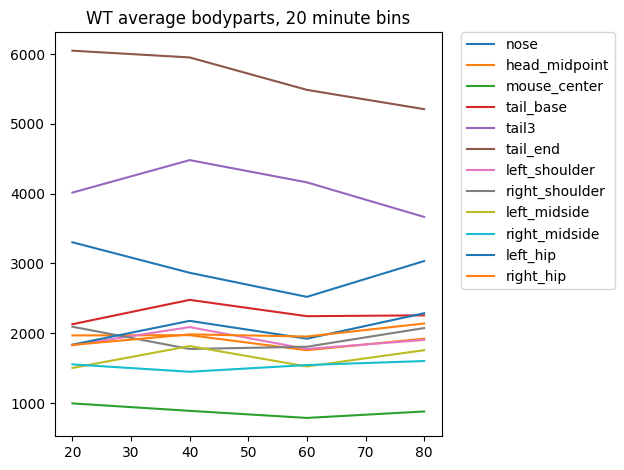

In [49]:
# plot for genotypes (all bodyparts)
for part in bodyparts:
    WT_avg = WT_twenty_mins.xs(part, level="bodypart")["average"]
    plt.plot(WT_avg, label=part)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("WT average bodyparts, 20 minute bins")
plt.tight_layout()

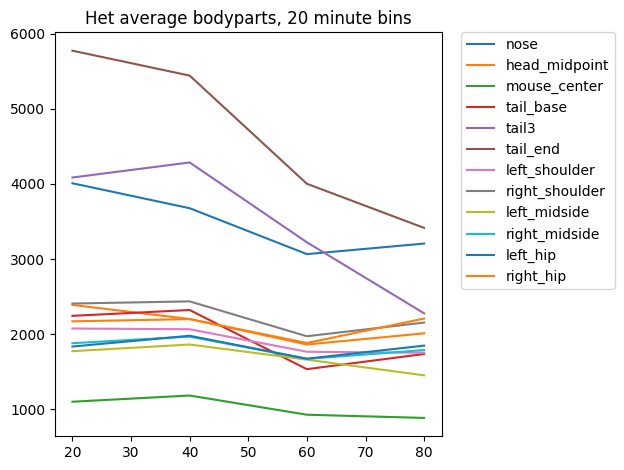

In [48]:
# plot for genotypes (all bodyparts) 
for part in bodyparts:
    Het_avg = Het_twenty_mins.xs(part, level="bodypart")["average"]
    plt.plot(Het_avg, label=part)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Het average bodyparts, 20 minute bins")
plt.tight_layout()

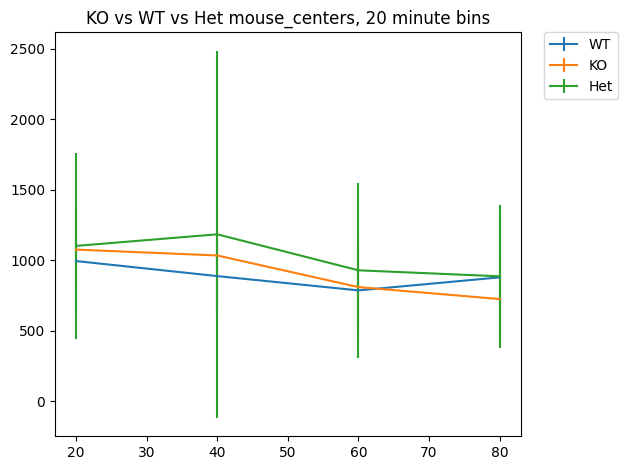

In [47]:
# plot ko vs wt: using mouse_center 
WT_mouse_center_avg = WT_twenty_mins.xs("mouse_center", level="bodypart")["average"]
WT_mouse_center_std = WT_twenty_mins.xs("mouse_center", level="bodypart")["std"]
KO_mouse_center_avg = KO_twenty_mins.xs("mouse_center", level="bodypart")["average"]
KO_mouse_center_std = KO_twenty_mins.xs("mouse_center", level="bodypart")["std"]
Het_mouse_center_avg = Het_twenty_mins.xs("mouse_center", level="bodypart")["average"]
Het_mouse_center_std = Het_twenty_mins.xs("mouse_center", level="bodypart")["std"]

x_mins = [20,40,60,80]

plt.errorbar(x_mins, WT_mouse_center_avg, yerr=WT_mouse_center_std, label="WT")
plt.errorbar(x_mins, KO_mouse_center_avg, yerr=KO_mouse_center_std, label="KO")
plt.errorbar(x_mins, Het_mouse_center_avg, yerr=Het_mouse_center_std, label="Het")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("KO vs WT vs Het mouse_centers, 20 minute bins")
plt.tight_layout()

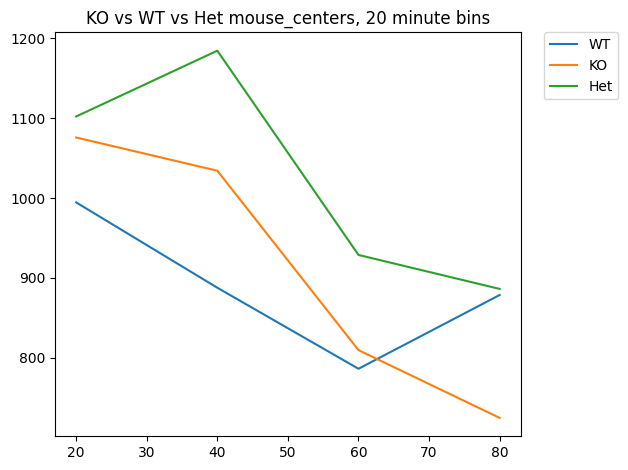

In [52]:
# plot ko vs wt: using mouse_center 
WT_mouse_center_avg = WT_twenty_mins.xs("mouse_center", level="bodypart")["average"]
KO_mouse_center_avg = KO_twenty_mins.xs("mouse_center", level="bodypart")["average"]
Het_mouse_center_avg = Het_twenty_mins.xs("mouse_center", level="bodypart")["average"]


x_mins = [20,40,60,80]

plt.plot(WT_mouse_center_avg, label="WT")
plt.plot(KO_mouse_center_avg, label="KO")
plt.plot(Het_mouse_center_avg, label="Het")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("KO vs WT vs Het mouse_centers, 20 minute bins")
plt.tight_layout()

#### 30 minute binning
** not working yet. just getting 30 and 60. go back to binning distances including remainder chatgpt

In [ ]:
for i, ind in enumerate(subjects):
    sec_dist_path = locomotion_dir.joinpath("second_movement", f"{ind}_sec_dists.csv")
    df = pd.read_csv(sec_dist_path, index_col=[0, 1, 2])
    dfs = []

    export_path = Path(f"{locomotion_dir}/thirty_minute_movement/{ind}_thirty_mins.csv")
    if export_path.is_file():
        print(f"{ind}'s thirty minute spreadsheet has already been created.")
        continue
    
    for part in bodyparts:
        # read in sec_dists from csv for each bodypart
        sec_dists = df.xs(
            (ind, part),
            level=("name", "bodypart")
        )["distance"].to_numpy()

        # use binned_dist function to bin data in 30 minute chunks
        thirty_dists = lf.binned_dist(sec_dists, 30, 'm')
        m = len(thirty_dists)
        df_loop = pd.DataFrame(
            {"distance": thirty_dists},
            index=pd.MultiIndex.from_arrays(
                [
                    np.repeat(ind, m+1),
                    np.repeat(part, m+1),
                    np.arange(start=30, stop=(m+1)*30, step=30)
                ],
                names=["name", "bodypart", "minute"]
            )
        )
        dfs.append(df_loop)
    
    del df

    dfs_min = pd.concat(dfs)
    dfs_min.to_csv(export_path)

    del dfs


ValueError: all arrays must be same length

#### plotting (almost works - one ind at a time)

ValueError: x and y must have same first dimension, but have shapes (17,) and (18,)

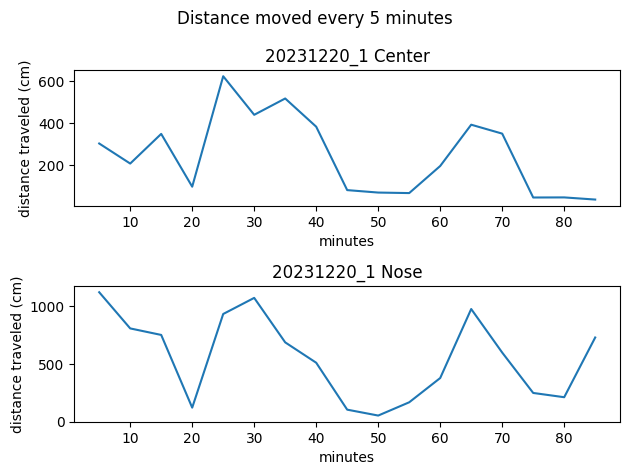

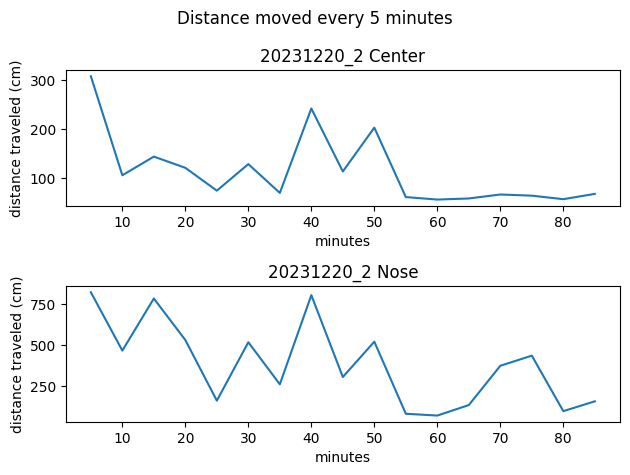

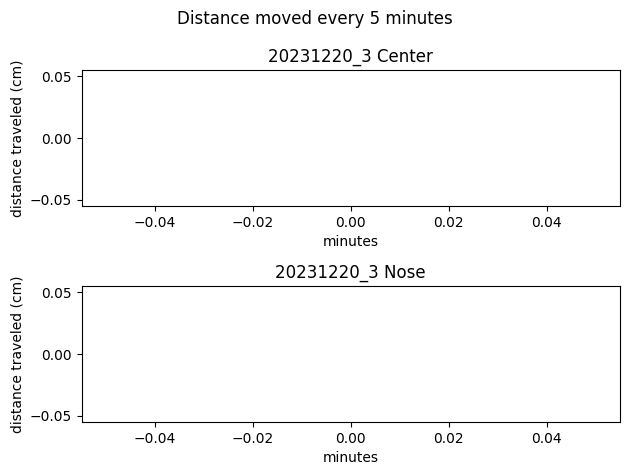

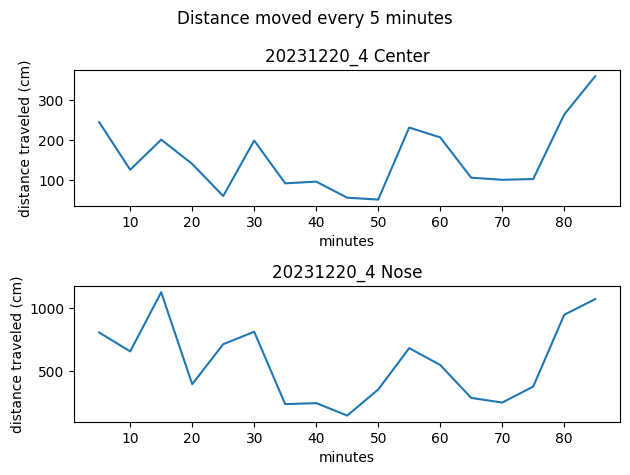

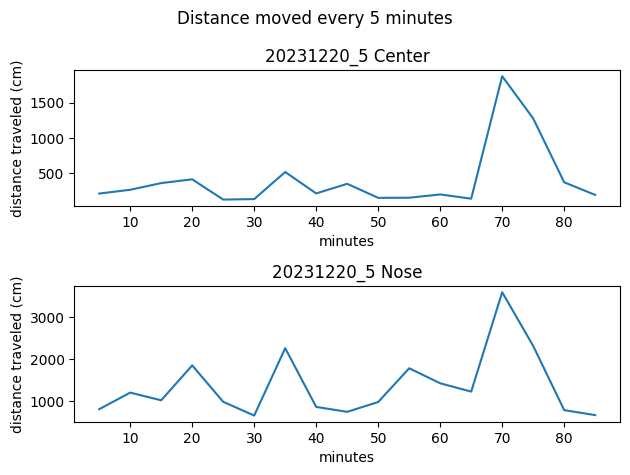

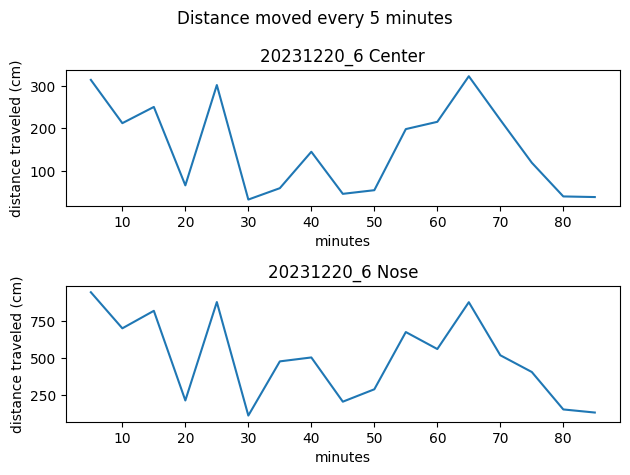

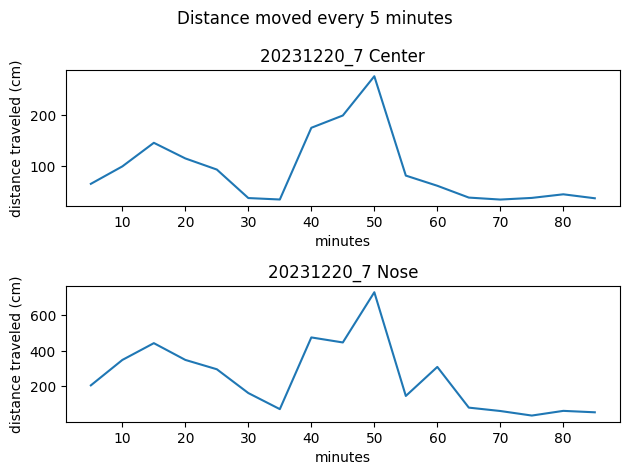

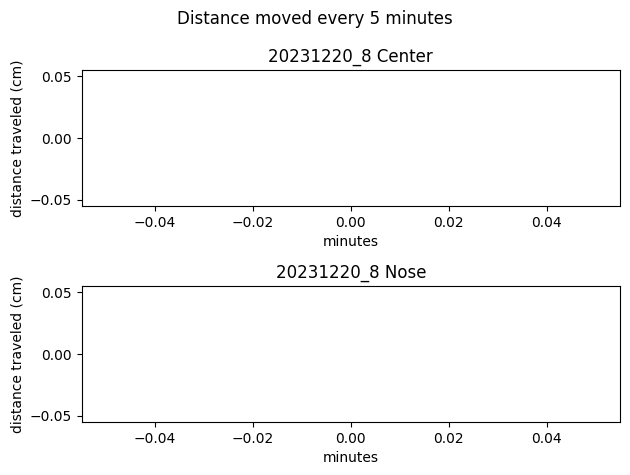

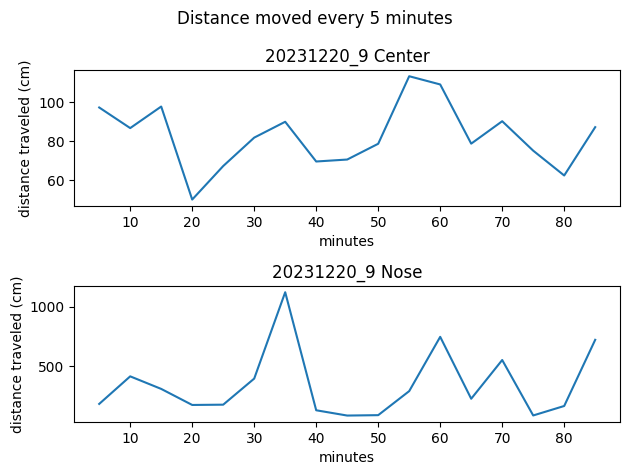

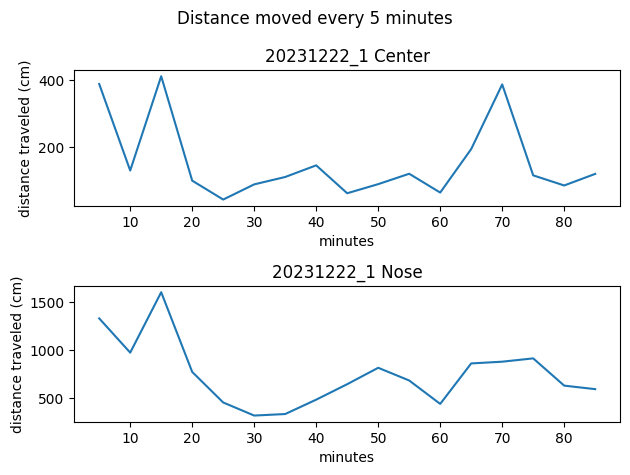

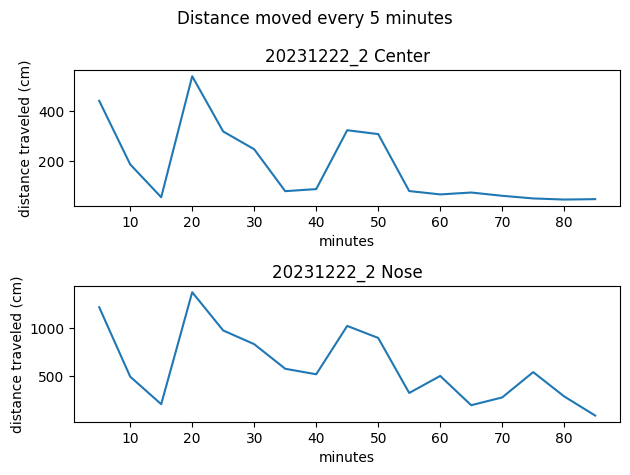

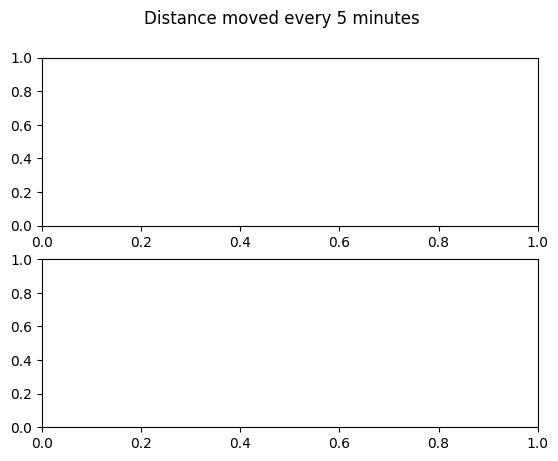

In [31]:
# extract the distance column of a specific individual and bodypart, then convert to numpy array for ease 
for i, ind in enumerate(subjects):
    five_min_path = Path(f"{locomotion_dir}/five_minute_movement/{ind}_fivemins.csv")
    dfs_min = pd.read_csv(five_min_path, index_col = ["bodypart"], usecols=["bodypart", "distance"])

    mouse_center = dfs_min.loc["mouse_center", "distance"]
    mouse_nose = dfs_min.loc["nose", "distance"]
    # dfs_min.xs(
    #     (ind, "mouse_center"),
    #     level=("name", "bodypart")
    # )["distance"].to_numpy()
    # mouse1_nose = dfs_min.xs(
    #     (subjects[0], "nose"), 
    #     level=("name", "bodypart")
    # )["distance"].to_numpy()

    minutes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

    fig, ax = plt.subplots(nrows=2, ncols=1)
    plt.suptitle("Distance moved every 5 minutes")
    ax[0].plot(minutes, mouse_center)
    ax[0].set_title(f"{ind} Center")
    ax[0].set_xlabel("minutes")
    ax[0].set_ylabel("distance traveled (cm)")
    ax[1].plot(minutes, mouse_nose)
    ax[1].set_title(f"{ind} Nose")
    ax[1].set_xlabel("minutes")
    ax[1].set_ylabel("distance traveled (cm)")
    plt.tight_layout()
    # plt.show()

    # plt.savefig(f"{locomotion_dir}/five_minute_movement/{ind}_plot.jpg")





# troubleshooting space

plot the trajectory over the 5 minutes of interest

#### check the roi coordinate pickle files

In [36]:
cup_coord_filenames = ["/Users/gracehickey/Documents/Research/Hammock/HTM/DLC/Results/p14_oxtrko/locomotion/roi_coordinates/20240304_10_cup_coords.pkl",
                       "/Users/gracehickey/Documents/Research/Hammock/HTM/DLC/Results/p14_oxtrko/locomotion/roi_coordinates/20231220_1_cup_coords.pkl"]
for filename in cup_coord_filenames:
    with open(filename, 'rb') as f: 
        roi_coord_data = pickle.load(f)
        print(f'x1 {roi_coord_data["x1"]}')
        # print(f'y1 {roi_coord_data["y1"]}')
        print(f'pix per cm x {roi_coord_data["pix_per_cm_x"]}')
        print(f'pix per cm y {roi_coord_data["pix_per_cm_y"]}')

x1 84
pix per cm x 13.333333333333334
pix per cm y 11.866666666666667
x1 70
pix per cm x 14.4
pix per cm y 14.0
